In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("x_test shape:", x_test.shape)    # (10000, 32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [3]:
# Input layer
input_img = keras.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 310s 793ms/step - loss: 0.5687 - val_loss: 0.5669
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 326s 803ms/step - loss: 0.5658 - val_loss: 0.5646
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 782ms/step - loss: 0.5641 - val_loss: 0.5652
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 312s 797ms/step - loss: 0.5636 - val_loss: 0.5636
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 782ms/step - loss: 0.5624 - val_loss: 0.5634


In [6]:
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


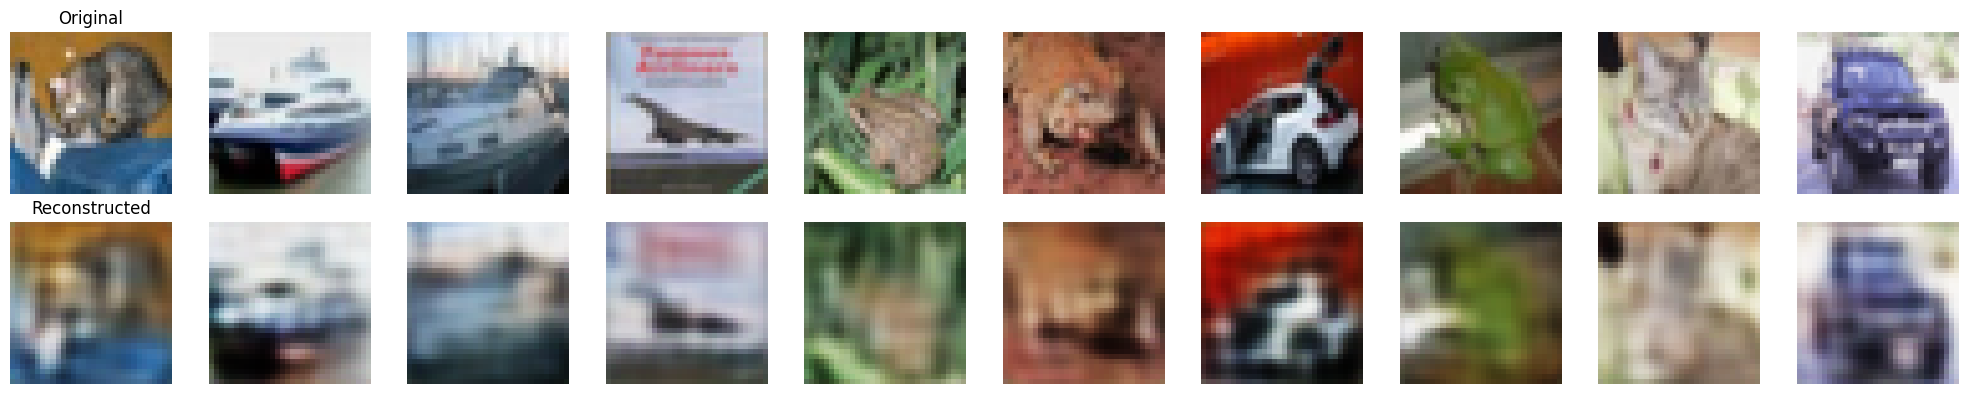

In [7]:
n = 10  # number of images to display
plt.figure(figsize=(20,4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.axis('off')
    if i == 0: ax.set_title("Original")

    # Reconstructed images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    ax.axis('off')
    if i == 0: ax.set_title("Reconstructed")

plt.tight_layout()
plt.show()
